In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

def log_transform(data, base=math.e):
    """
    Apply logarithmic transformation to data.
    
    Parameters:
    data (array-like): Input data
    base (float): Base of logarithm (default: e - natural log)
    
    Returns:
    array: Log-transformed data
    """
    # Handle zero and negative values
    min_val = np.min(data)
    if min_val <= 0:
        offset = abs(min_val) + 1
        data_adjusted = data + offset
    else:
        data_adjusted = data
        
    if base == math.e:
        return np.log(data_adjusted)
    elif base == 10:
        return np.log10(data_adjusted)
    elif base == 2:
        return np.log2(data_adjusted)
    else:
        return np.log(data_adjusted) / np.log(base)

def sqrt_transform(data):
    """
    Apply square root transformation to data.
    
    Parameters:
    data (array-like): Input data
    
    Returns:
    array: Square root-transformed data
    """
    # Handle negative values
    min_val = np.min(data)
    if min_val < 0:
        offset = abs(min_val) + 1e-6
        data_adjusted = data + offset
    else:
        data_adjusted = data
    
    return np.sqrt(data_adjusted)

def cube_root_transform(data):
    """
    Apply cube root transformation to data.
    
    Parameters:
    data (array-like): Input data
    
    Returns:
    array: Cube root-transformed data
    """
    return np.cbrt(data)

def box_cox_transform(data, lmbda=None):
    """
    Apply Box-Cox transformation to data.
    
    Parameters:
    data (array-like): Input data (must be positive)
    lmbda (float, optional): Parameter for the Box-Cox transformation
                            If None, the function will find the optimal lambda value
    
    Returns:
    tuple: (transformed data, lambda value used)
    """
    # Handle non-positive values
    min_val = np.min(data)
    if min_val <= 0:
        offset = abs(min_val) + 1
        data_adjusted = data + offset
    else:
        data_adjusted = data
    
    if lmbda is None:
        transformed_data, lambda_value = stats.boxcox(data_adjusted)
        return transformed_data, lambda_value
    else:
        transformed_data = stats.boxcox(data_adjusted, lmbda=lmbda)
        return transformed_data, lmbda

def yeo_johnson_transform(data, lmbda=None):
    """
    Apply Yeo-Johnson transformation to data.
    
    Parameters:
    data (array-like): Input data (can be positive or negative)
    lmbda (float, optional): Parameter for the Yeo-Johnson transformation
                            If None, the function will find the optimal lambda value
    
    Returns:
    tuple: (transformed data, lambda value used)
    """
    if lmbda is None:
        transformed_data, lambda_value = stats.yeojohnson(data)
        return transformed_data, lambda_value
    else:
        transformed_data = stats.yeojohnson(data, lmbda=lmbda)
        return transformed_data, lmbda

def inverse_transform(data):
    """
    Apply inverse (reciprocal) transformation to data.
    
    Parameters:
    data (array-like): Input data (should not contain zeros)
    
    Returns:
    array: Reciprocal-transformed data
    """
    # Handle zeros
    epsilon = 1e-10
    data_adjusted = np.where(np.abs(data) < epsilon, np.sign(data) * epsilon, data)
    
    return 1.0 / data_adjusted

def power_transform(data, power):
    """
    Apply power transformation to data.
    
    Parameters:
    data (array-like): Input data
    power (float): Power to raise data to
    
    Returns:
    array: Power-transformed data
    """
    # Handle negative values for even powers
    if power % 2 == 0 and np.min(data) < 0:
        offset = abs(np.min(data)) + 1e-6
        data_adjusted = data + offset
    else:
        data_adjusted = data
    
    return np.power(data_adjusted, power)

def arcsin_transform(data):
    """
    Apply arcsin transformation to data (useful for proportions/percentages).
    
    Parameters:
    data (array-like): Input data (values should be between 0 and 1)
    
    Returns:
    array: Arcsin-transformed data
    """
    # Clip data to [0, 1] range
    data_clipped = np.clip(data, 0, 1)
    
    return np.arcsin(np.sqrt(data_clipped))

def z_score_transform(data):
    """
    Standardize data to have mean=0 and std=1 (Z-score normalization).
    
    Parameters:
    data (array-like): Input data
    
    Returns:
    array: Z-score transformed data
    """
    return stats.zscore(data)

def min_max_transform(data, feature_range=(0, 1)):
    """
    Scale data to a specified range, default [0, 1] (Min-Max scaling).
    
    Parameters:
    data (array-like): Input data
    feature_range (tuple): Desired range for transformed data
    
    Returns:
    array: Min-Max scaled data
    """
    min_val, max_val = feature_range
    data_min = np.min(data)
    data_max = np.max(data)
    
    # Handle case where all values are the same
    if data_max == data_min:
        return np.full_like(data, (min_val + max_val) / 2)
    
    return min_val + ((data - data_min) * (max_val - min_val)) / (data_max - data_min)

def robust_scale_transform(data):
    """
    Scale data using statistics that are robust to outliers (median and IQR).
    
    Parameters:
    data (array-like): Input data
    
    Returns:
    array: Robustly scaled data
    """
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    # Handle zero IQR
    if iqr == 0:
        iqr = 1e-10
    
    return (data - median) / iqr

def analyze_and_plot_transformations(data, transformations=None):
    """
    Analyze and plot the original data and various transformations.
    
    Parameters:
    data (array-like): Input data
    transformations (list): List of transformation functions to apply
    
    Returns:
    dict: Dictionary containing transformed data
    """
    if transformations is None:
        transformations = [
            ('Original', lambda x: x),
            ('Log', lambda x: log_transform(x)),
            ('Square Root', lambda x: sqrt_transform(x)),
            ('Cube Root', lambda x: cube_root_transform(x)),
            ('Box-Cox', lambda x: box_cox_transform(x)[0]),
            ('Yeo-Johnson', lambda x: yeo_johnson_transform(x)[0]),
            ('Z-Score', lambda x: z_score_transform(x)),
            ('Min-Max', lambda x: min_max_transform(x))
        ]
    
    results = {}
    
    n_transformations = len(transformations)
    n_cols = 3
    n_rows = (n_transformations + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, (name, transform_func) in enumerate(transformations):
        try:
            transformed = transform_func(data)
            results[name] = transformed
            
            plt.subplot(n_rows, n_cols, i + 1)
            
            # Histogram
            plt.hist(transformed, bins=30, alpha=0.7, color='skyblue')
            
            # Add a density curve
            if len(transformed) > 1:  # Need at least 2 points for kde
                try:
                    density = stats.gaussian_kde(transformed)
                    x_vals = np.linspace(min(transformed), max(transformed), 1000)
                    plt.plot(x_vals, density(x_vals) * len(transformed) * (max(transformed) - min(transformed)) / 30, 
                             color='navy', linewidth=2)
                except:
                    pass  # Skip density estimation if it fails
            
            plt.title(f'{name} Transform')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            
            # Add skewness and kurtosis info
            skew = stats.skew(transformed)
            kurt = stats.kurtosis(transformed)
            plt.annotate(f'Skewness: {skew:.4f}\nKurtosis: {kurt:.4f}', 
                         xy=(0.05, 0.95), xycoords='axes fraction',
                         fontsize=10, va='top', bbox=dict(boxstyle='round', fc='white', alpha=0.7))
            
        except Exception as e:
            plt.subplot(n_rows, n_cols, i + 1)
            plt.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')
            plt.title(f'{name} Transform (Failed)')
    
    plt.tight_layout()
    return results, plt.gcf()

2025-03-16 02:38:16.766 
  command:

    streamlit run C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


AttributeError: 'DataFrame' object has no attribute 'append'

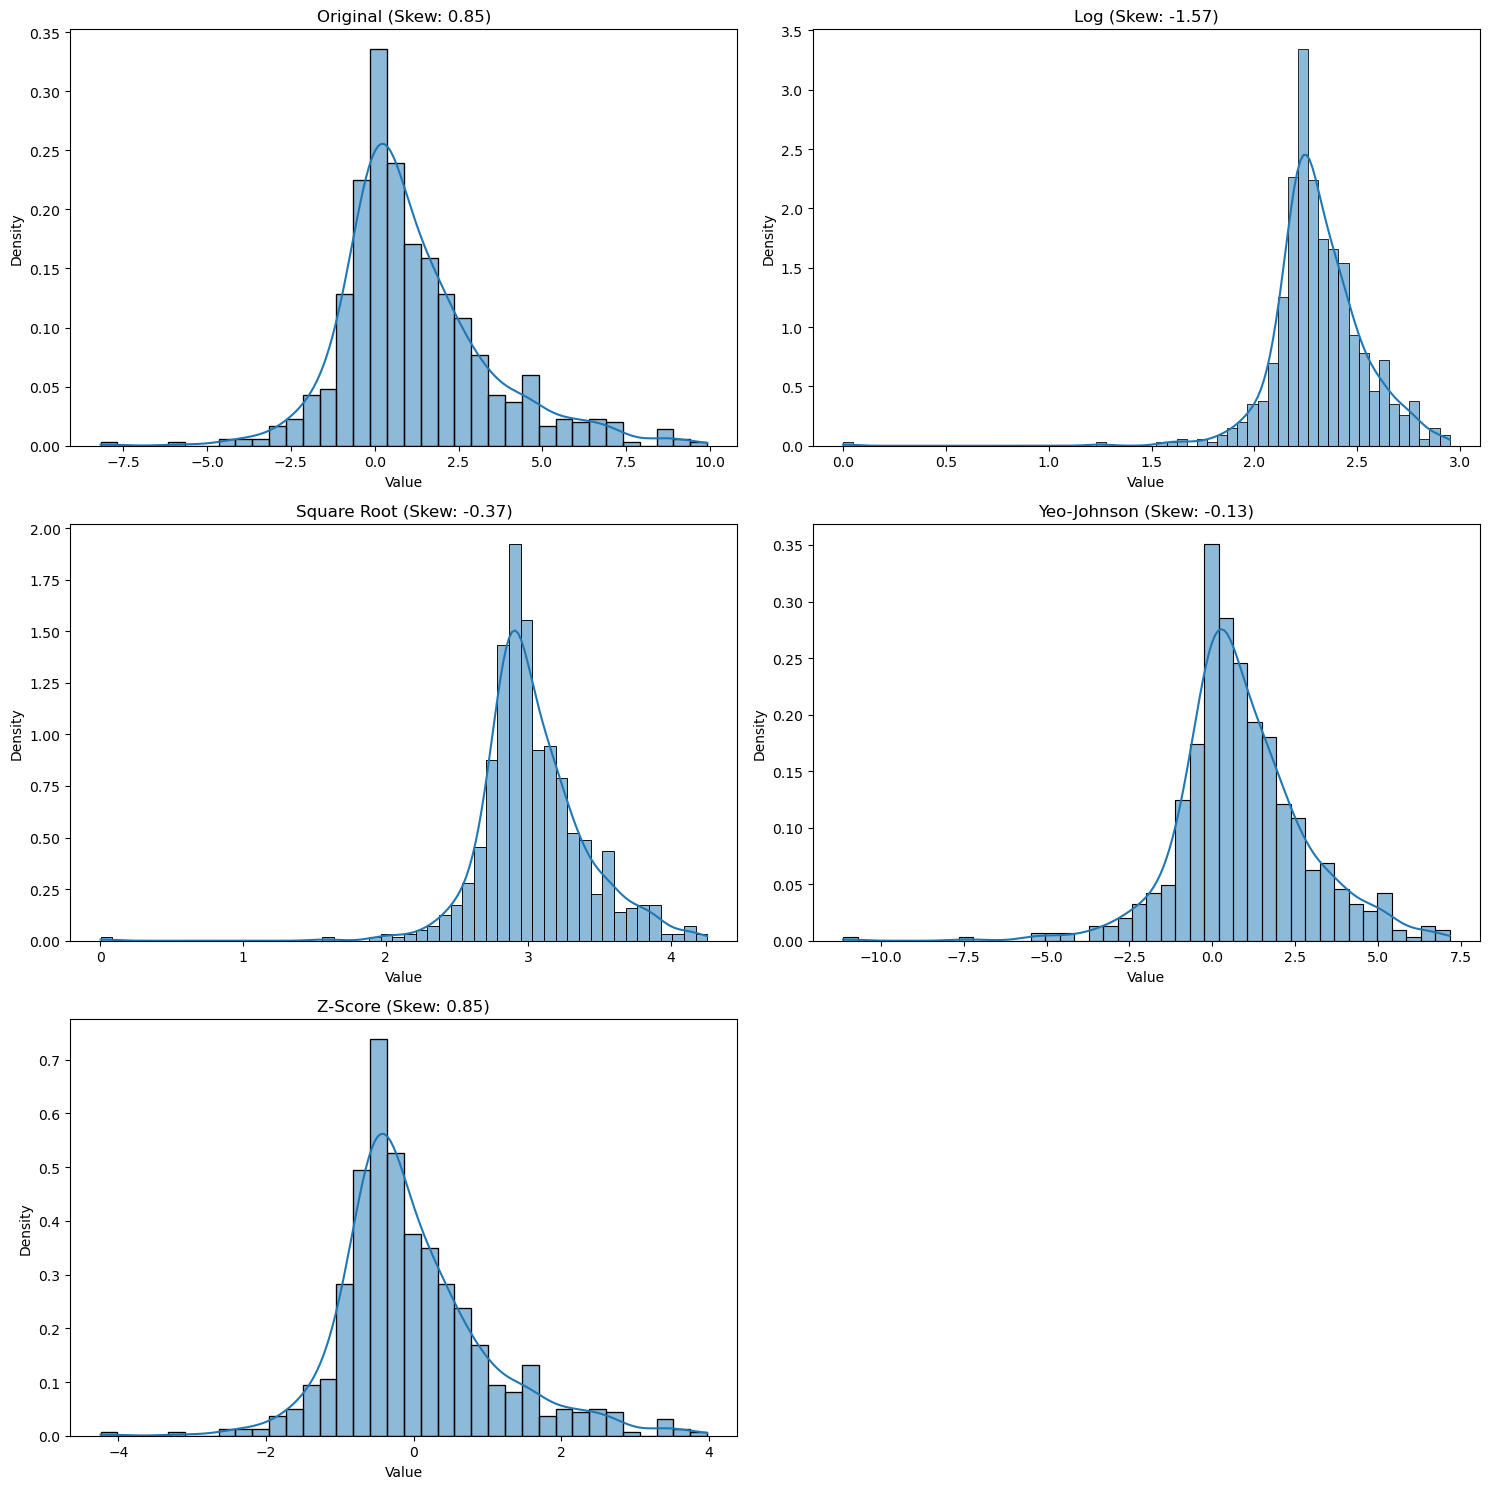

In [2]:
import streamlit as st
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import io
import base64

# Set page config
st.set_page_config(
    page_title="Data Transformation Explorer",
    page_icon="📊",
    layout="wide"
)

# Title and description
st.title("📊 Data Transformation Explorer")
st.markdown("""
This app allows you to explore various data transformations and their effects on your data distribution.
Upload your own CSV file or try with example data.
""")

# Define transformation functions
def log_transform(data, base=math.e):
    """Apply logarithmic transformation to data."""
    min_val = np.min(data)
    if min_val <= 0:
        offset = abs(min_val) + 1
        data_adjusted = data + offset
    else:
        data_adjusted = data
        
    if base == math.e:
        return np.log(data_adjusted)
    elif base == 10:
        return np.log10(data_adjusted)
    elif base == 2:
        return np.log2(data_adjusted)
    else:
        return np.log(data_adjusted) / np.log(base)

def sqrt_transform(data):
    """Apply square root transformation to data."""
    min_val = np.min(data)
    if min_val < 0:
        offset = abs(min_val) + 1e-6
        data_adjusted = data + offset
    else:
        data_adjusted = data
    return np.sqrt(data_adjusted)

def cube_root_transform(data):
    """Apply cube root transformation to data."""
    return np.cbrt(data)

def box_cox_transform(data, lmbda=None):
    """Apply Box-Cox transformation to data."""
    min_val = np.min(data)
    if min_val <= 0:
        offset = abs(min_val) + 1
        data_adjusted = data + offset
    else:
        data_adjusted = data
    
    if lmbda is None:
        transformed_data, lambda_value = stats.boxcox(data_adjusted)
        return transformed_data, lambda_value
    else:
        transformed_data = stats.boxcox(data_adjusted, lmbda=lmbda)
        return transformed_data, lmbda

def yeo_johnson_transform(data, lmbda=None):
    """Apply Yeo-Johnson transformation to data."""
    if lmbda is None:
        transformed_data, lambda_value = stats.yeojohnson(data)
        return transformed_data, lambda_value
    else:
        transformed_data = stats.yeojohnson(data, lmbda=lmbda)
        return transformed_data, lmbda

def inverse_transform(data):
    """Apply inverse (reciprocal) transformation to data."""
    epsilon = 1e-10
    data_adjusted = np.where(np.abs(data) < epsilon, np.sign(data) * epsilon, data)
    return 1.0 / data_adjusted

def power_transform(data, power):
    """Apply power transformation to data."""
    if power % 2 == 0 and np.min(data) < 0:
        offset = abs(np.min(data)) + 1e-6
        data_adjusted = data + offset
    else:
        data_adjusted = data
    return np.power(data_adjusted, power)

def arcsin_transform(data):
    """Apply arcsin transformation to data (useful for proportions/percentages)."""
    data_clipped = np.clip(data, 0, 1)
    return np.arcsin(np.sqrt(data_clipped))

def z_score_transform(data):
    """Standardize data to have mean=0 and std=1 (Z-score normalization)."""
    return stats.zscore(data)

def min_max_transform(data, feature_range=(0, 1)):
    """Scale data to a specified range, default [0, 1] (Min-Max scaling)."""
    min_val, max_val = feature_range
    data_min = np.min(data)
    data_max = np.max(data)
    if data_max == data_min:
        return np.full_like(data, (min_val + max_val) / 2)
    return min_val + ((data - data_min) * (max_val - min_val)) / (data_max - data_min)

def robust_scale_transform(data):
    """Scale data using statistics that are robust to outliers (median and IQR)."""
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    if iqr == 0:
        iqr = 1e-10
    return (data - median) / iqr

# Sidebar for data input
st.sidebar.header("Data Input")
data_source = st.sidebar.radio("Choose data source:", ("Example Data", "Upload CSV"))

if data_source == "Example Data":
    # Generate sample data
    np.random.seed(42)
    data = np.concatenate([np.random.exponential(scale=2, size=500), 
                          -np.random.exponential(scale=1, size=200)])
    df = pd.DataFrame(data, columns=['Value'])
else:
    uploaded_file = st.sidebar.file_uploader("Upload CSV file", type=['csv'])
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
    else:
        st.warning("Please upload a CSV file")
        st.stop()

# Column selection
if data_source == "Upload CSV" and uploaded_file is not None:
    column = st.sidebar.selectbox("Select column to transform", df.columns)
else:
    column = 'Value'

data = df[column].dropna().values

# Transformation selection
st.sidebar.header("Transformation Settings")
available_transforms = {
    "Log": log_transform,
    "Square Root": sqrt_transform,
    "Cube Root": cube_root_transform,
    "Box-Cox": lambda x: box_cox_transform(x)[0],
    "Yeo-Johnson": lambda x: yeo_johnson_transform(x)[0],
    "Inverse": inverse_transform,
    "Power": power_transform,
    "Arcsin": arcsin_transform,
    "Z-Score": z_score_transform,
    "Min-Max": min_max_transform,
    "Robust Scale": robust_scale_transform
}

selected_transforms = st.sidebar.multiselect(
    "Select transformations to apply",
    list(available_transforms.keys()),
    default=["Log", "Square Root", "Yeo-Johnson", "Z-Score"]
)

# Additional parameters
if "Log" in selected_transforms:
    log_base = st.sidebar.selectbox("Log base", ["e", "10", "2"], index=0)
    log_base = math.e if log_base == "e" else float(log_base)

if "Power" in selected_transforms:
    power_value = st.sidebar.slider("Power value", 0.1, 5.0, 2.0)

# Main content
st.header("Transformation Results")

# Process transformations
results = {"Original": data}
transform_params = {}

for transform_name in selected_transforms:
    try:
        if transform_name == "Log":
            results[transform_name] = available_transforms[transform_name](data, base=log_base)
        elif transform_name == "Power":
            results[transform_name] = available_transforms[transform_name](data, power_value)
        else:
            results[transform_name] = available_transforms[transform_name](data)
    except Exception as e:
        st.error(f"Error applying {transform_name}: {str(e)}")

# Visualization
n_cols = 2
n_rows = int(np.ceil((len(results)) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, (name, transformed_data) in enumerate(results.items()):
    sns.histplot(transformed_data, ax=axes[idx], kde=True, stat="density")
    axes[idx].set_title(f"{name} (Skew: {stats.skew(transformed_data):.2f})")
    axes[idx].set_xlabel("Value")
    axes[idx].set_ylabel("Density")

# Remove empty subplots
for idx in range(len(results), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
st.pyplot(fig)

# Statistics
st.header("Summary Statistics")
stats_df = pd.DataFrame({
    "Transformation": [],
    "Mean": [],
    "Std": [],
    "Skewness": [],
    "Kurtosis": []
})

for name, transformed_data in results.items():
    stats_df = stats_df.append({
        "Transformation": name,
        "Mean": np.mean(transformed_data),
        "Std": np.std(transformed_data),
        "Skewness": stats.skew(transformed_data),
        "Kurtosis": stats.kurtosis(transformed_data)
    }, ignore_index=True)

st.dataframe(stats_df.style.format("{:.4f}", subset=["Mean", "Std", "Skewness", "Kurtosis"]))

# Download option
csv = stats_df.to_csv(index=False)
b64 = base64.b64encode(csv.encode()).decode()
href = f'<a href="data:file/csv;base64,{b64}" download="transformation_stats.csv">Download Statistics CSV</a>'
st.markdown(href, unsafe_allow_html=True)